In [276]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load the dataset

In [160]:
cad_df = pd.read_csv('data/CAD.csv')
cad_df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


# Assessing Dataset

In [161]:
cad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [162]:
cad_df.nunique()

Age                       46
Weight                    54
Length                    44
Sex                        2
BMI                      262
DM                         2
HTN                        2
Current Smoker             2
EX-Smoker                  2
FH                         2
Obesity                    2
CRF                        2
CVA                        2
Airway disease             2
Thyroid Disease            2
CHF                        2
DLP                        2
BP                        17
PR                        21
Edema                      2
Weak Peripheral Pulse      2
Lung rales                 2
Systolic Murmur            2
Diastolic Murmur           2
Typical Chest Pain         2
Dyspnea                    2
Function Class             4
Atypical                   2
Nonanginal                 2
Exertional CP              1
LowTH Ang                  2
Q Wave                     2
St Elevation               2
St Depression              2
Tinversion    

In [163]:
# Check for missing values
cad_df.isna().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
F

In [164]:
# Check for duplicates
cad_df.duplicated().sum()

0

# Data Preprocessing

## Classfiying variables

In [165]:
# Numerical variables:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

# Categorical variables:
cat_cols = ['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'Cath']

# Ordinal variables
ord_cols = ['Function Class', "Region RWMA", "VHD"]

In [167]:
# Check for unique values in categorical variables
for col in cat_cols:
    print(f'{col}: {cad_df[col].unique()}')

Sex: ['Male' 'Fmale']
DM: [0 1]
HTN: [1 0]
Current Smoker: [1 0]
EX-Smoker: [0 1]
FH: [0 1]
Obesity: ['Y' 'N']
CRF: ['N' 'Y']
CVA: ['N' 'Y']
Airway disease: ['N' 'Y']
Thyroid Disease: ['N' 'Y']
CHF: ['N' 'Y']
DLP: ['Y' 'N']
Edema: [0 1]
Weak Peripheral Pulse: ['N' 'Y']
Lung rales: ['N' 'Y']
Systolic Murmur: ['N' 'Y']
Diastolic Murmur: ['N' 'Y']
Typical Chest Pain: [0 1]
Dyspnea: ['N' 'Y']
Atypical: ['N' 'Y']
Nonanginal: ['N' 'Y']
Exertional CP: ['N']
LowTH Ang: ['N' 'Y']
Q Wave: [0 1]
St Elevation: [0 1]
St Depression: [1 0]
Tinversion: [1 0]
LVH: ['N' 'Y']
Poor R Progression: ['N' 'Y']
Cath: ['Cad' 'Normal']


In [168]:
# Check for unique values in ordinal variables
for col in ord_cols:
    print(f'{col}: {cad_df[col].unique()}')

Function Class: [0 3 2 1]
Region RWMA: [0 4 2 3 1]
VHD: ['N' 'mild' 'Severe' 'Moderate']


## Encoding

In [171]:
label_encoder = LabelEncoder()

In [170]:
# Encoding categorical variables
for col in cat_cols:
    cad_df[col] = label_encoder.fit_transform(cad_df[col])
cad_df[cat_cols].head()

,Sex,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,...,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,Cath
0,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
# Encoding VHD
cad_df['VHD'] = label_encoder.fit_transform(cad_df['VHD'])
cad_df[ord_cols].head()

,Function Class,Region RWMA,VHD
0,0,0,1
1,0,4,1
2,0,2,3
3,3,0,2
4,2,0,2


## Numerical Variables Normalization

In [174]:
scaler = StandardScaler()

In [176]:
# Normalizing numerical variables
for col in num_cols:
    cad_df[col] = scaler.fit_transform(cad_df[[col]])
    
cad_df[num_cols].head()


,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,...,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE
0,-0.568446,1.351012,1.104333,0.522817,-1.034254,0.546031,-0.561315,-1.347725,1.019010,1.424985,...,-1.368075,-0.783276,1.521673,1.025931,0.000868,-0.772712,0.662975,-0.801571,0.650977,0.310686
1,0.780937,-0.320172,-0.828604,0.281122,0.552475,0.546031,-0.753646,-0.210758,1.622296,0.462854,...,1.799548,0.410930,0.464323,1.025931,3.946579,0.057248,0.562534,-0.506461,-0.930681,-0.811339
2,-0.472061,-1.657120,-0.076906,-1.752404,-1.563163,2.793959,-0.657481,-0.210758,-0.484094,-0.980342,...,-0.072229,-0.594717,0.215534,1.025931,-0.525227,-0.067246,0.562534,-0.014609,0.140233,-0.811339
3,0.684552,-0.570850,-0.721218,-0.100118,-1.563163,0.546031,-0.792113,0.547220,-0.893101,-1.404812,...,1.799548,3.553576,-0.655225,0.370114,0.263916,2.256644,-1.446280,1.165833,8.575744,0.871699
4,-0.857599,1.100334,-1.258145,2.423417,-1.034254,0.546031,-0.292051,-0.210758,0.200994,0.151576,...,-0.216212,0.473783,0.028943,-0.504308,-0.262179,0.679719,2.270027,-2.080384,0.865160,0.310686


In [177]:
cad_df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,-0.568446,1.351012,1.104333,1,0.522817,0,1,1,0,0,...,1.025931,0.000868,-0.772712,0.662975,-0.801571,0.650977,0.310686,0,1,0
1,0.780937,-0.320172,-0.828604,0,0.281122,0,1,0,0,0,...,1.025931,3.946579,0.057248,0.562534,-0.506461,-0.930681,-0.811339,4,1,0
2,-0.472061,-1.657120,-0.076906,1,-1.752404,0,0,1,0,0,...,1.025931,-0.525227,-0.067246,0.562534,-0.014609,0.140233,-0.811339,2,3,0
3,0.684552,-0.570850,-0.721218,0,-0.100118,0,1,0,0,0,...,0.370114,0.263916,2.256644,-1.446280,1.165833,8.575744,0.871699,0,2,1
4,-0.857599,1.100334,-1.258145,0,2.423417,0,1,0,0,0,...,-0.504308,-0.262179,0.679719,2.270027,-2.080384,0.865160,0.310686,0,2,1


In [178]:
preprocessed_df = cad_df.copy()

In [182]:
preprocessed_df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
       'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA',
       'VHD', 'Cath'],
      dtype='object')

## Train, Validation, Test Split

In [194]:
X = preprocessed_df.drop('Cath', axis=1)
y = preprocessed_df['Cath']

Train Test Split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [196]:
print("Training Data Shape: ", X_train.shape, y_train.shape)
print("Testing Data Shape: ", X_test.shape, y_test.shape)

Training Data Shape:  (242, 54) (242,)
Testing Data Shape:  (61, 54) (61,)


Train Validation Split

In [197]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [198]:
print("Training Data Shape: ", X_train.shape, y_train.shape)
print("Validation Data Shape: ", X_val.shape, y_val.shape)

Training Data Shape:  (193, 54) (193,)
Validation Data Shape:  (49, 54) (49,)


In [199]:
# Check the distribution of the target variable
y_train.value_counts()

Cath
0    138
1     55
Name: count, dtype: int64

## Oversampling the minority class

In [200]:
from imblearn.over_sampling import SMOTENC

cat_ord_cols = cat_cols + ord_cols
cat_ord_cols.remove('Cath')

smote = SMOTENC(categorical_features=cat_ord_cols, random_state=42)
print("Original Train Data: ", X_train.shape, y_train.shape)

X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled Train Data: ", X_train.shape, y_train.shape)

Original Train Data:  (193, 54) (193,)
Resampled Train Data:  (276, 54) (276,)


In [201]:
# Check the distribution of the target variable
y_train.value_counts()

Cath
1    138
0    138
Name: count, dtype: int64

# ML Model Building

In [269]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

D:\PycharmProjects\Image Captioning Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [270]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

## Training the Model

In [271]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4342 - loss: 0.7178 - val_accuracy: 0.6122 - val_loss: 0.6229
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6854 - loss: 0.6162 - val_accuracy: 0.7755 - val_loss: 0.5500
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7758 - loss: 0.5313 - val_accuracy: 0.8367 - val_loss: 0.4938
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8778 - loss: 0.4495 - val_accuracy: 0.8571 - val_loss: 0.4448
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8780 - loss: 0.4145 - val_accuracy: 0.8980 - val_loss: 0.4032
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8884 - loss: 0.3472 - val_accuracy: 0.9184 - val_loss: 0.3611
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9027 - loss: 0.2985 - val_accuracy: 0.9184 - val_loss: 0.3348
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9361 - loss: 0.2502 - val_accuracy: 0.9184 - val_loss: 0.3151
Epoch 9

In [273]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8282 - loss: 0.6276


[0.6289498805999756, 0.8360655903816223]

# Model Evaluation

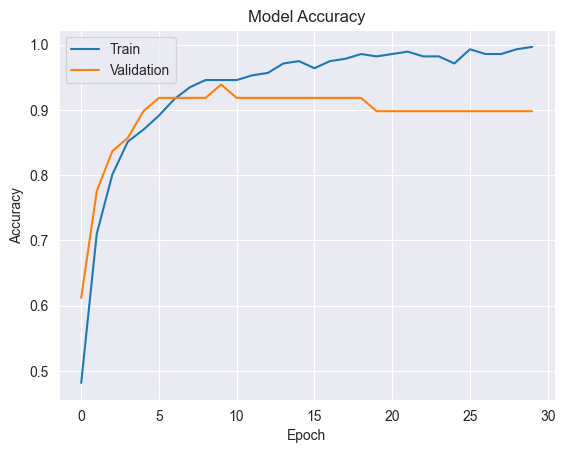

In [274]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

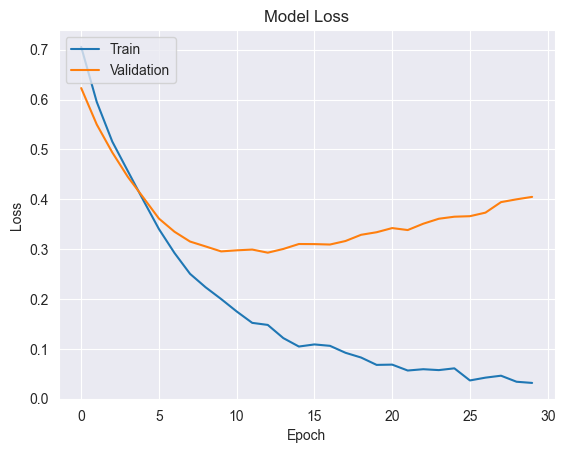

In [297]:
# Plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Test Data Evaluation

In [301]:
def get_clf_eval(y_test, pred, pred_proba):

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    plt.figure(figsize=(15, 7))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    eval_metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc}

    return eval_metrics

In [304]:
pred = model.predict(X_test)
pred = (pred > 0.5).astype(int)
pred_proba = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


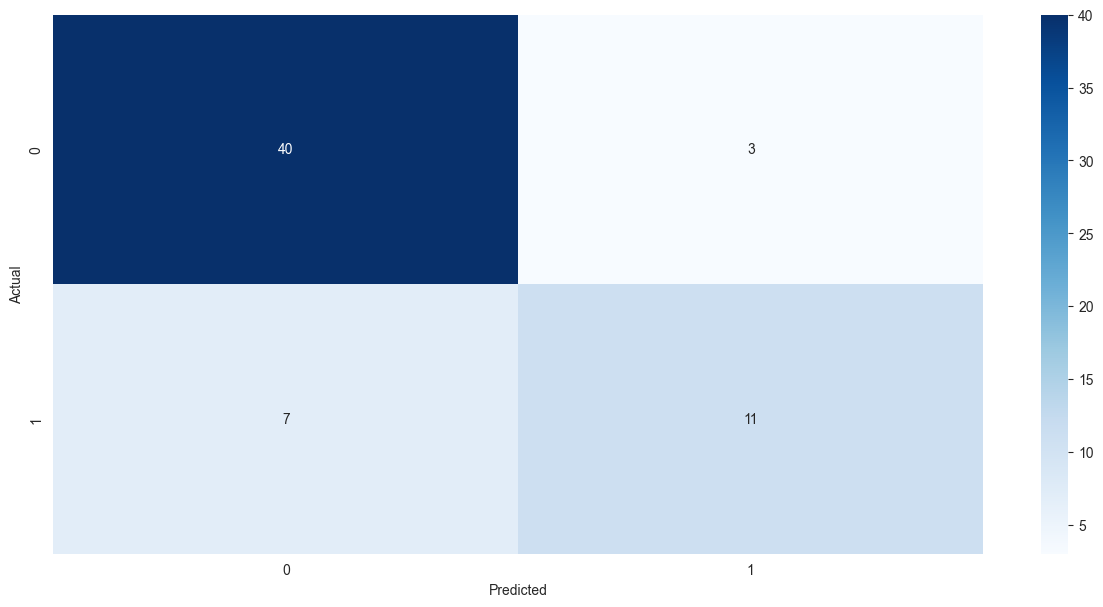

In [305]:
metrics_test = get_clf_eval(y_test, pred, pred_proba)